In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/output.csv')

In [3]:
df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,12.247694,0.235294,0.5,0.418208,0.366344,0.0,0.5,1.0,1.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.090909,0.50,1.0,0.5
1,2,12.109011,0.000000,0.5,0.495064,0.391317,0.0,0.5,1.0,1.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.363636,0.25,1.0,0.5
2,3,12.317167,0.235294,0.5,0.434909,0.422359,0.0,0.5,0.0,1.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.727273,0.50,1.0,0.5
3,4,11.849398,0.294118,0.5,0.388581,0.390295,0.0,0.5,0.0,1.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.090909,0.00,1.0,0.0
4,5,12.429216,0.235294,0.5,0.513123,0.468761,0.0,0.5,0.0,1.0,...,0.0,0.0,0.0,0.5,0.0,0.0,1.000000,0.50,1.0,0.5


In [4]:
X = df.drop(['Id', 'SalePrice'], axis = 1)
y = df['SalePrice']

In [42]:
y.mean()

12.024050901109383

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size=0.2)

In [8]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test', X_test.shape)
print('y_test:', y_test.shape)

X_train: (1168, 79)
y_train: (1168,)
X_test (292, 79)
y_test: (292,)


# Feature selection and regression

1.   Random Forest regressor
2. XGBoost
2.   Gradient Boosting regressor
5. Neural Net








In [16]:
pipeline_rfr = Pipeline([
    ('feature_selector', SelectFromModel(Ridge())),  # Feature selection using Ridge
    ('regressor', RandomForestRegressor())  # RandomForestRegressor as the final model
])


In [17]:
pipeline_rfr.fit(X_train, y_train)

Pipeline(steps=[('feature_selector', SelectFromModel(estimator=Ridge())),
                ('regressor', RandomForestRegressor())])

In [18]:
y_pred_rfr = pipeline_rfr.predict(X_test)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
print(f'Mean Absolute Error: {mae_rfr:.2f}')
r2_score_rfr = r2_score(y_test, y_pred_rfr)
print(f'R2 Score: {r2_score_rfr:.2f}')

Mean Absolute Error: 0.10
R2 Score: 0.88


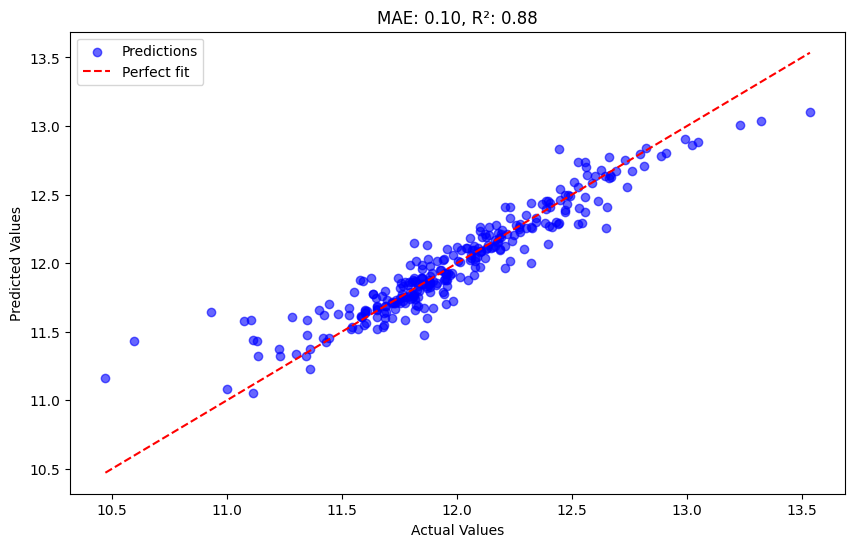

In [19]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_rfr, color='blue', label='Predictions', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect fit')

# Labels and title
plt.title(f'MAE: {mae_rfr:.2f}, R²: {r2_score_rfr:.2f}')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show plot
plt.show()

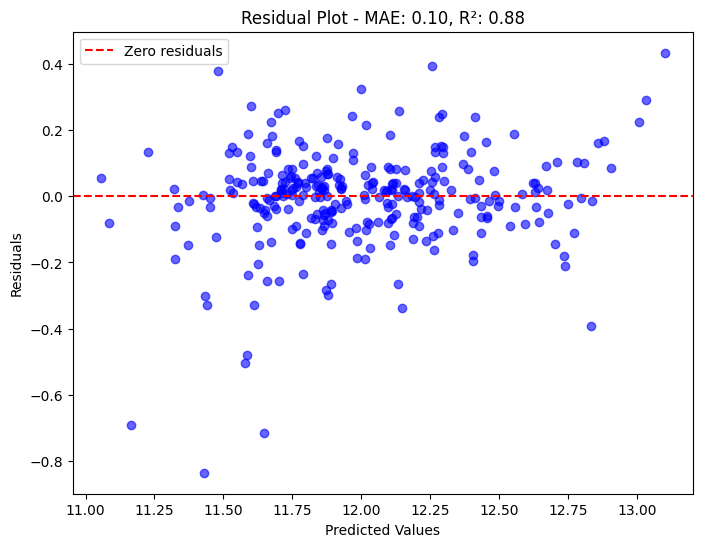

In [20]:
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred_rfr
plt.scatter(y_pred_rfr, residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', label='Zero residuals')
plt.title(f'Residual Plot - MAE: {mae_rfr:.2f}, R²: {r2_score_rfr:.2f}')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [28]:
param_grid = {
    'feature_selector__estimator__alpha': [0.1, 0.5, 1.0],
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(pipeline_rfr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('feature_selector',
                                        SelectFromModel(estimator=Ridge())),
                                       ('regressor', RandomForestRegressor())]),
             param_grid={'feature_selector__estimator__alpha': [0.1, 0.5, 1.0],
                         'regressor__max_depth': [3, 5, 7],
                         'regressor__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [29]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'feature_selector__estimator__alpha': 1.0, 'regressor__max_depth': 7, 'regressor__n_estimators': 300}
Best score: -0.024173187381284843


In [30]:
from_sel_model_grid = SelectFromModel(Ridge(alpha =0.5))

In [31]:
from_sel_model_grid.fit(X_train, y_train)

SelectFromModel(estimator=Ridge(alpha=0.5))

In [32]:
from_sel_model_grid.get_support()

array([False,  True, False,  True, False, False, False, False,  True,
       False,  True, False, False,  True, False, False,  True,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True, False, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False,  True])

In [33]:
selected_feat_rfr = X_train.columns[(from_sel_model_grid.get_support())]
selected_feat_rfr

Index(['MSZoning', 'LotArea', 'Utilities', 'LandSlope', 'Condition2',
       'OverallQual', 'OverallCond', 'YearBuilt', 'RoofMatl', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'KitchenAbvGr',
       'Functional', 'GarageCars', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'SaleCondition'],
      dtype='object')

In [35]:
best_model = grid_search.best_estimator_

# Predict the target on the test set
y_pred = best_model.predict(X_test)

# Calculate MAE on the test set
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) on the test set:", mae)

Mean Absolute Error (MAE) on the test set: 0.10545104658029111


In [36]:
train_score = best_model.score(X_train, y_train)  # R^2 score for regression (or you can use MAE)
test_score = best_model.score(X_test, y_test)

print("Training R^2 score:", train_score)
print("Test R^2 score:", test_score)

# For MAE:
train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)

train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Test MAE:", test_mae)

Training R^2 score: 0.9398190570623544
Test R^2 score: 0.8710222129617559
Training MAE: 0.07273191732676006
Test MAE: 0.10545104658029111


Based on the metrics provided, the model shows some signs of overfitting, as evidenced by the gap between the training and test performance. The model is doing very well on the training set (high R², low MAE), but not as well on the test set (slightly lower R², higher MAE).

In [37]:
# Get cross-validation results from grid search
cv_results = grid_search.cv_results_

# Mean cross-validation score for each parameter setting
print("Mean CV scores for each parameter combination:", cv_results['mean_test_score'])

# You can also look at the best mean cross-validation score
print("Best cross-validation score:", grid_search.best_score_)

Mean CV scores for each parameter combination: [-0.03954264 -0.03971325 -0.03960688 -0.02876546 -0.02846835 -0.02890785
 -0.02422452 -0.02461062 -0.02447407 -0.03960651 -0.03919602 -0.03913081
 -0.02866143 -0.02819096 -0.02849097 -0.0242076  -0.02430956 -0.02419522
 -0.03938822 -0.03942247 -0.03946291 -0.02896455 -0.02838962 -0.02825951
 -0.02443698 -0.02426644 -0.02417319]
Best cross-validation score: -0.024173187381284843


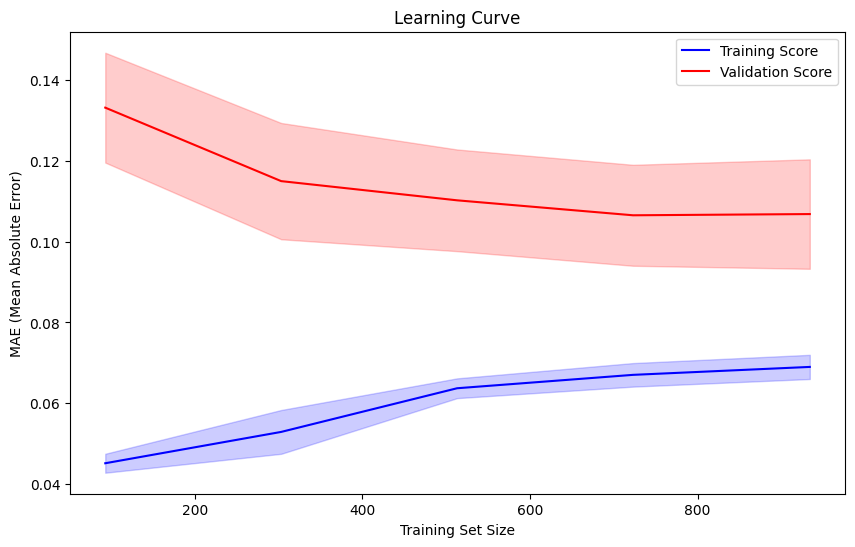

In [38]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Plot the learning curve
plt.figure(figsize=(10, 6))

# Mean and std for training and validation scores
train_mean = -train_scores.mean(axis=1)
val_mean = -val_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_std = val_scores.std(axis=1)

plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.plot(train_sizes, val_mean, label="Validation Score", color="red")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color="red")

plt.xlabel('Training Set Size')
plt.ylabel('MAE (Mean Absolute Error)')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()

In [39]:
y_pred_original = np.exp(y_pred)
y_test_original = np.exp(y_test)

# Now compute MAE on the original scale
mae_original = mean_absolute_error(y_test_original, y_pred_original)
print("MAE on the original scale:", mae_original)

MAE on the original scale: 18668.54153182208


So, with an MAE of 0.1 on the log scale, you can expect a 11.7% error in your predictions on the original sales price scale.

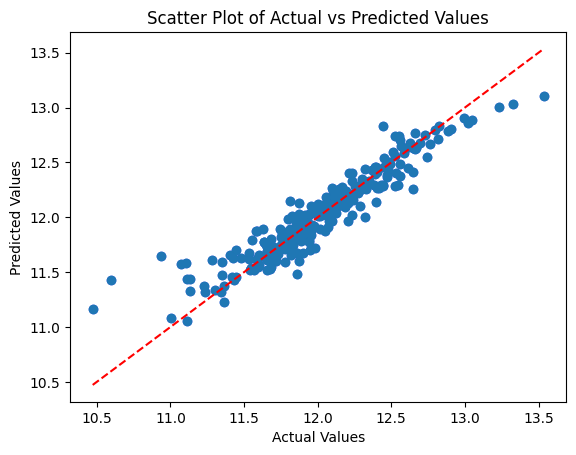

In [44]:
plt.scatter(y_test, y_pred_rfr, color='blue', label='Predictions', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect fit')
plt.scatter(y_test, y_pred_rfr)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.show()

#Gradient boosting Regressor

In [186]:
pipeline_gbr = Pipeline ([
    ('feature_selector', SelectFromModel(Ridge())),
    ('gradient_boosting_regressor', GradientBoostingRegressor())
])

In [187]:
pipeline_gbr.fit(X_train, y_train)
y_pred_gbr = pipeline_gbr.predict(X_test)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
print(f'Mean Absolute Error: {mae_gbr:.2f}')
r2_score_gbr = r2_score(y_test, y_pred_gbr)
print(f'R2 Score: {r2_score_gbr:.2f}')

Mean Absolute Error: 0.10
R2 Score: 0.89


In [188]:
param_grid = {
    'feature_selector__estimator__alpha': [0.01, 0.05, 0.1, 0.5, 1],
    'gradient_boosting_regressor__n_estimators': [50, 100, 200, 300],
    'gradient_boosting_regressor__learning_rate': [0.05, 0.1, 0.2, 0.3],
    'gradient_boosting_regressor__max_depth': [3, 5, 7]
}

grid_search_gbr = GridSearchCV(pipeline_gbr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_gbr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('feature_selector',
                                        SelectFromModel(estimator=Ridge())),
                                       ('gradient_boosting_regressor',
                                        GradientBoostingRegressor())]),
             param_grid={'feature_selector__estimator__alpha': [0.01, 0.05, 0.1,
                                                                0.5, 1],
                         'gradient_boosting_regressor__learning_rate': [0.05,
                                                                        0.1,
                                                                        0.2,
                                                                        0.3],
                         'gradient_boosting_regressor__max_depth': [3, 5, 7],
                         'gradient_boosting_regressor__n_estimators': [50, 100,
                                                                       200,
                                                                       300]},
             scoring='neg_mean_squared_error')

In [189]:
print("Best parameters:", grid_search_gbr.best_params_)
print("Best score:", grid_search_gbr.best_score_)

Best parameters: {'feature_selector__estimator__alpha': 1, 'gradient_boosting_regressor__learning_rate': 0.1, 'gradient_boosting_regressor__max_depth': 3, 'gradient_boosting_regressor__n_estimators': 200}
Best score: -0.018155615733157996


In [190]:
best_model_gbr = grid_search_gbr.best_estimator_

# Predict the target on the test set
y_pred = best_model_gbr.predict(X_test)

# Calculate MAE on the test set
mae_gbr = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) on the test set:", mae)

Mean Absolute Error (MAE) on the test set: 0.09409970170162657


In [191]:
train_score = best_model_gbr.score(X_train, y_train)  # R^2 score for regression (or you can use MAE)
test_score = best_model_gbr.score(X_test, y_test)

print("Training R^2 score:", train_score)
print("Test R^2 score:", test_score)

# For MAE:
train_predictions = best_model_gbr.predict(X_train)
test_predictions = best_model_gbr.predict(X_test)

train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Test MAE:", test_mae)

Training R^2 score: 0.9650552405187621
Test R^2 score: 0.890580142137354
Training MAE: 0.0548994722937993
Test MAE: 0.09673574841886198


The test MAE on the log scale is higher than the training MAE on the log scale (0.0967 vs. 0.0549). This difference indicates that the model is making larger errors on the test set compared to the training set, which is an indicator of potential overfitting.

In [ ]:
# Get cross-validation results from grid search
cv_results_gbr = grid_search_gbr.cv_results_

# Mean cross-validation score for each parameter setting
print("Mean CV scores for each parameter combination:", cv_results_gbr['mean_test_score'])

# You can also look at the best mean cross-validation score
print("Best cross-validation score:", grid_search_gbr.best_score_)

In [192]:
y_pred_original = np.exp(y_pred)
y_test_original = np.exp(y_test)

# Now compute MAE on the original scale
mae_original = mean_absolute_error(y_test_original, y_pred_original)
print("MAE on the original scale:", mae_original)

MAE on the original scale: 16685.206169567165


So, with an MAE of 0.096 on the log scale, you can expect a 10.06% error in your predictions on the original sales price scale.

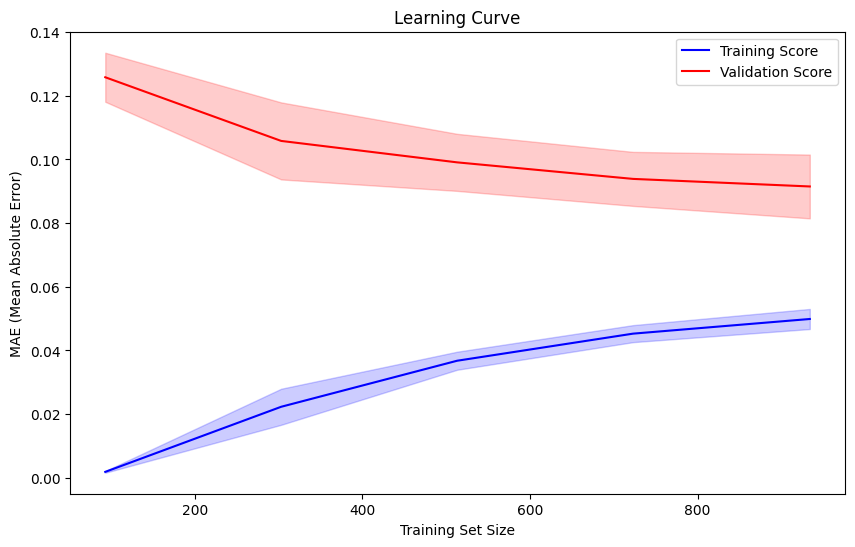

In [193]:
train_sizes, train_scores, val_scores = learning_curve(
    best_model_gbr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Plot the learning curve
plt.figure(figsize=(10, 6))

# Mean and std for training and validation scores
train_mean = -train_scores.mean(axis=1)
val_mean = -val_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_std = val_scores.std(axis=1)

plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.plot(train_sizes, val_mean, label="Validation Score", color="red")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color="red")

plt.xlabel('Training Set Size')
plt.ylabel('MAE (Mean Absolute Error)')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()

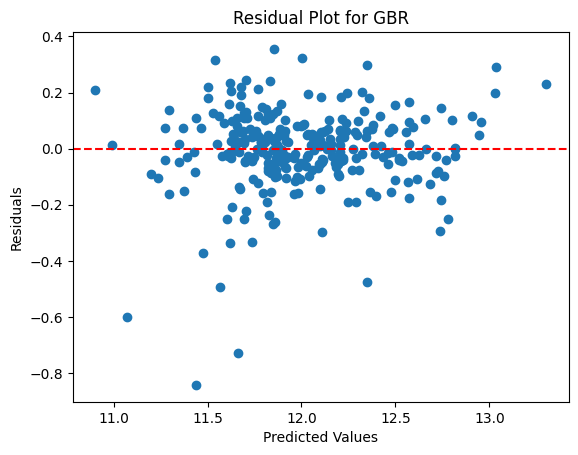

In [194]:
residuals_gbr = y_test - y_pred
plt.scatter(y_pred, residuals_gbr)
plt.axhline(0, color='red', linestyle='--', label='Zero residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for GBR')
plt.show()

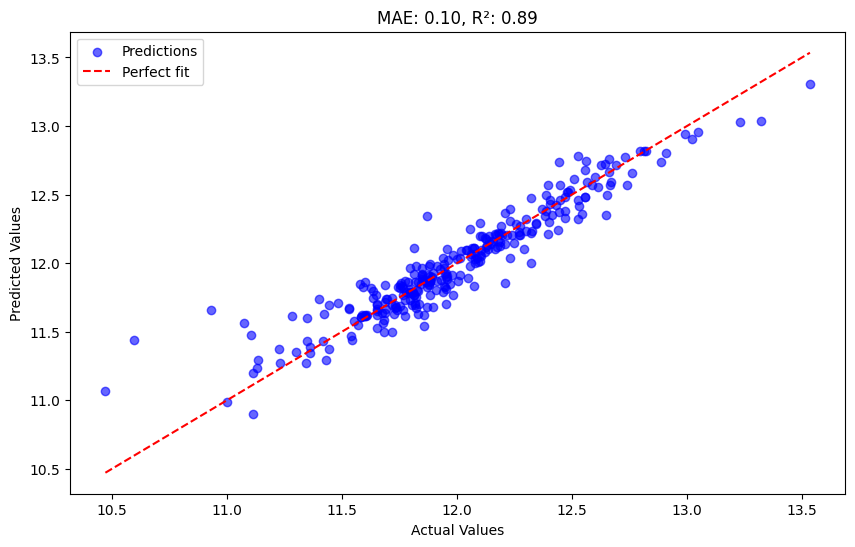

In [195]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predictions', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect fit')

# Labels and title
plt.title(f'MAE: {mae_gbr:.2f}, R²: {r2_score_gbr:.2f}')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show plot
plt.show()

#XGBRegressor


In [81]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
pipeline_xgb = Pipeline([
    ('feature_selector', SelectFromModel(Ridge())),   # Feature selection using Ridge regression
    ('xgb_regressor', xgb_model)  # XGBoost regressor
])


In [196]:
param_grid_xgb = {
    'feature_selector__estimator__alpha': [0.01, 0.05, 0.1, 0.5, 1],
    'xgb_regressor__n_estimators': [100, 200],         # Number of trees
    'xgb_regressor__max_depth': [3, 5, 7],             # Maximum depth of trees
    'xgb_regressor__learning_rate': [0.01, 0.05, 0.1, 0.2]  # Learning rate
}

In [197]:
pipeline_xgb.fit(X_train, y_train)
y_pred_xgb = pipeline_xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f'Mean Absolute Error: {mae_xgb:.2f}')
r2_score_xgb = r2_score(y_test, y_pred_xgb)
print(f'R2 Score: {r2_score_xgb:.2f}')

Mean Absolute Error: 0.11
R2 Score: 0.85


In [198]:
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

In [199]:
grid_search_xgb.fit(X_train, y_train)

# Best parameters from GridSearchCV
print(f"Best Parameters: {grid_search_xgb.best_params_}")

# Predict using the best model
best_model_xgb = grid_search_xgb.best_estimator_
y_pred = best_model_xgb.predict(X_test)

# Calculate MAE (Mean Absolute Error) for the test set
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Best Parameters: {'feature_selector__estimator__alpha': 0.5, 'xgb_regressor__learning_rate': 0.1, 'xgb_regressor__max_depth': 3, 'xgb_regressor__n_estimators': 200}
Mean Absolute Error: 0.0922603085933099


In [200]:
train_score = best_model_xgb.score(X_train, y_train)  # R^2 score for regression (or you can use MAE)
test_score = best_model_xgb.score(X_test, y_test)

print("Training R^2 score:", train_score)
print("Test R^2 score:", test_score)

# For MAE:
train_predictions = best_model_xgb.predict(X_train)
test_predictions = best_model_xgb.predict(X_test)

train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Test MAE:", test_mae)

Training R^2 score: 0.9562105860051546
Test R^2 score: 0.9040440249060666
Training MAE: 0.05958110260898245
Test MAE: 0.0922603085933099


The test MAE on the log scale is higher than the training MAE on the log scale (0.0923 vs. 0.0595. This difference indicates that the model is making larger errors on the test set compared to the training set, which is an indicator of potential overfitting.

In [201]:
# Get cross-validation results from grid search
cv_results_xgb = grid_search_xgb.cv_results_

# Mean cross-validation score for each parameter setting
print("Mean CV scores for each parameter combination:", cv_results_xgb['mean_test_score'])

# You can also look at the best mean cross-validation score
print("Best cross-validation score:", grid_search_xgb.best_score_)

Mean CV scores for each parameter combination: [-0.16981945 -0.1276577  -0.1596734  -0.11851451 -0.15851159 -0.12149262
 -0.10644009 -0.10424116 -0.10607863 -0.1056469  -0.1111654  -0.11118621
 -0.10414873 -0.10370229 -0.1067489  -0.10729348 -0.11087124 -0.11194277
 -0.10594326 -0.10740278 -0.1086593  -0.11023502 -0.1136965  -0.11400428
 -0.16849105 -0.12469731 -0.15900887 -0.1153244  -0.15646577 -0.11622344
 -0.10101326 -0.09699334 -0.10047384 -0.09902817 -0.10333746 -0.10282876
 -0.09690202 -0.09620416 -0.09951789 -0.09976011 -0.10298814 -0.10321394
 -0.09843011 -0.0985428  -0.10116411 -0.10253563 -0.10477249 -0.10514951
 -0.16846934 -0.12437647 -0.1588832  -0.11469645 -0.15590448 -0.11491082
 -0.10006705 -0.09529611 -0.09934008 -0.0977249  -0.10202803 -0.10124162
 -0.09523739 -0.09403023 -0.09866529 -0.09846509 -0.10094929 -0.10121488
 -0.09732463 -0.09687274 -0.0996684  -0.10024514 -0.10435845 -0.10470207
 -0.1678271  -0.12279337 -0.1581265  -0.1129633  -0.15525692 -0.11365045
 -0.

In [202]:
y_pred_original = np.exp(y_pred)
y_test_original = np.exp(y_test)

# Now compute MAE on the original scale
mae_original = mean_absolute_error(y_test_original, y_pred_original)
print("MAE on the original scale:", mae_original)

MAE on the original scale: 16306.865435038511


So, with an MAE of 0.0922 on the log scale, you can expect a 9.6% error in your predictions on the original sales price scale.

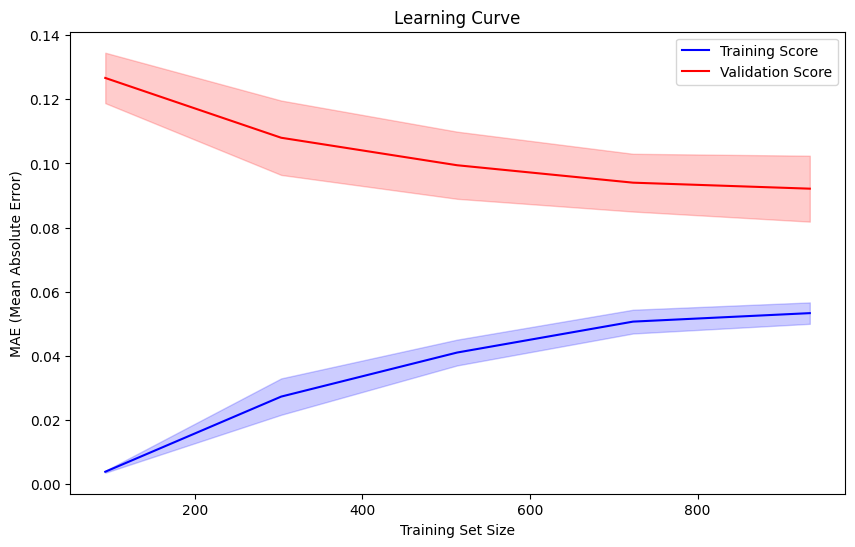

In [203]:
train_sizes, train_scores, val_scores = learning_curve(
    best_model_xgb, X_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Plot the learning curve
plt.figure(figsize=(10, 6))

# Mean and std for training and validation scores
train_mean = -train_scores.mean(axis=1)
val_mean = -val_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_std = val_scores.std(axis=1)

plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.plot(train_sizes, val_mean, label="Validation Score", color="red")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color="red")

plt.xlabel('Training Set Size')
plt.ylabel('MAE (Mean Absolute Error)')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()

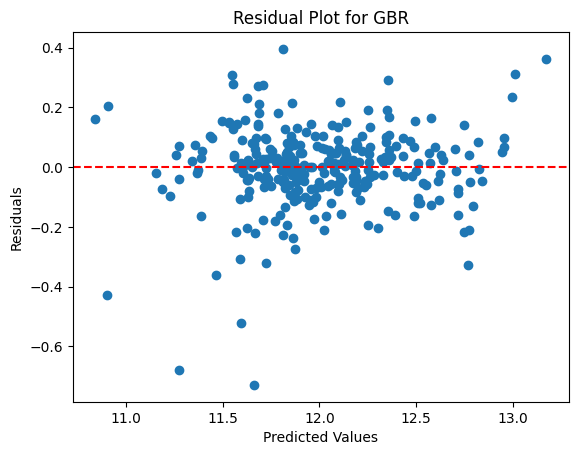

In [204]:
residuals_xgb = y_test - y_pred
plt.scatter(y_pred, residuals_xgb)
plt.axhline(0, color='red', linestyle='--', label='Zero residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for GBR')
plt.show()

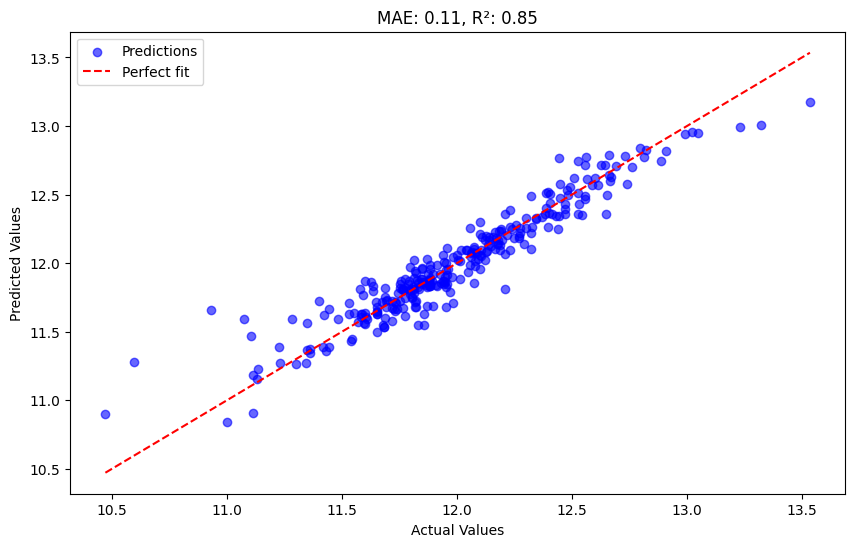

In [205]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predictions', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect fit')

# Labels and title
plt.title(f'MAE: {mae_xgb:.2f}, R²: {r2_score_xgb:.2f}')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show plot
plt.show()

#Neural Net

In [206]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.decomposition import PCA

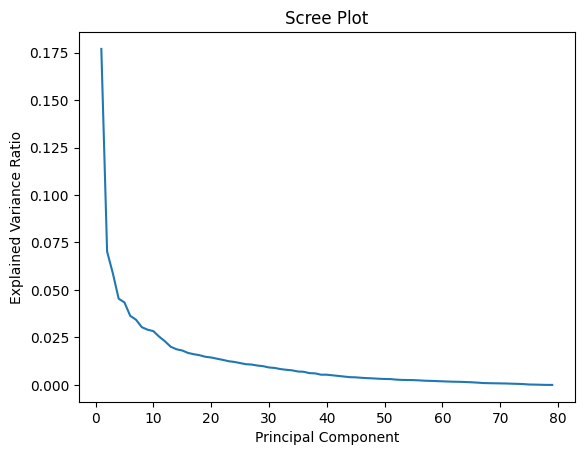

In [207]:
pca = PCA()
X_pca = pca.fit_transform(X)
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [208]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components needed to explain 95% of variance: {n_components}')

Number of components needed to explain 95% of variance: 47


In [209]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

In [217]:
model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.2), input_dim=X_pca.shape[1]))  # Input layer with 5 neurons
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer with 1 neuron
model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [218]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                     │ (None, 64)                  │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,233 (28.25 KB)

 Trainable params: 7,233 (28.25 KB)

 Non-trainable params: 0 (0.00 B)

In [219]:
early_stopping = EarlyStopping(monitor='val_loss',   # Metric to monitor (could also be 'val_accuracy')
                               patience=10,          # Wait 10 epochs for improvement
                               restore_best_weights=True)

In [220]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(X_test, y_test), callbacks=[early_stopping],
                    verbose=2)

Epoch 1/100
37/37 - 2s - 41ms/step - loss: 91.1061 - val_loss: 23.0102
Epoch 2/100
37/37 - 0s - 4ms/step - loss: 19.4382 - val_loss: 11.2428
Epoch 3/100
37/37 - 0s - 4ms/step - loss: 15.8888 - val_loss: 9.0795
Epoch 4/100
37/37 - 0s - 4ms/step - loss: 13.7953 - val_loss: 7.6070
Epoch 5/100
37/37 - 0s - 8ms/step - loss: 11.6736 - val_loss: 6.4395
Epoch 6/100
37/37 - 0s - 8ms/step - loss: 10.1170 - val_loss: 5.5133
Epoch 7/100
37/37 - 0s - 3ms/step - loss: 9.1192 - val_loss: 5.3968
Epoch 8/100
37/37 - 0s - 4ms/step - loss: 8.5514 - val_loss: 4.6467
Epoch 9/100
37/37 - 0s - 4ms/step - loss: 7.9311 - val_loss: 3.8381
Epoch 10/100
37/37 - 0s - 8ms/step - loss: 7.2776 - val_loss: 3.6845
Epoch 11/100
37/37 - 0s - 8ms/step - loss: 6.7025 - val_loss: 3.2433
Epoch 12/100
37/37 - 0s - 4ms/step - loss: 6.4243 - val_loss: 2.9146
Epoch 13/100
37/37 - 0s - 4ms/step - loss: 6.2907 - val_loss: 2.9055
Epoch 14/100
37/37 - 0s - 8ms/step - loss: 5.6621 - val_loss: 2.4701
Epoch 15/100
37/37 - 0s - 4ms/step

In [239]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {mse:.2f}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test MSE: 0.05


Test MSE (0.05) is quite low, indicating that the model's predictions are accurate on the test set.

In [222]:
# For MAE:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Test MAE:", test_mae)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training MAE: 0.16726478293755723
Test MAE: 0.1690597794218387


This is very similar to the training MAE, indicating that the model is generalizing well and not overfitting the training data.
So, with an MAE of 0.169 on the log scale, you can expect a 18.42% error in your predictions on the original sales price scale.

In [230]:
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)

R-squared:  0.7326181537138474


The fact that the training MAE is nearly equal to the test MAE indicates that your model is generalizing well. It's not overfitting or underfitting, which is a good sign. preventing overfitting since the performance on both training and test data is nearly identical

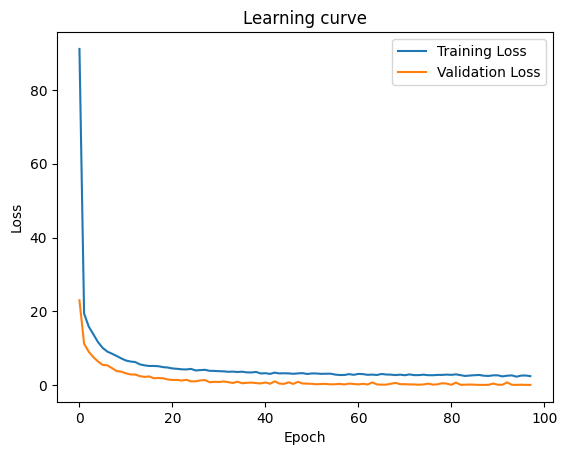

In [231]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Learning curve")
plt.legend()
plt.show()

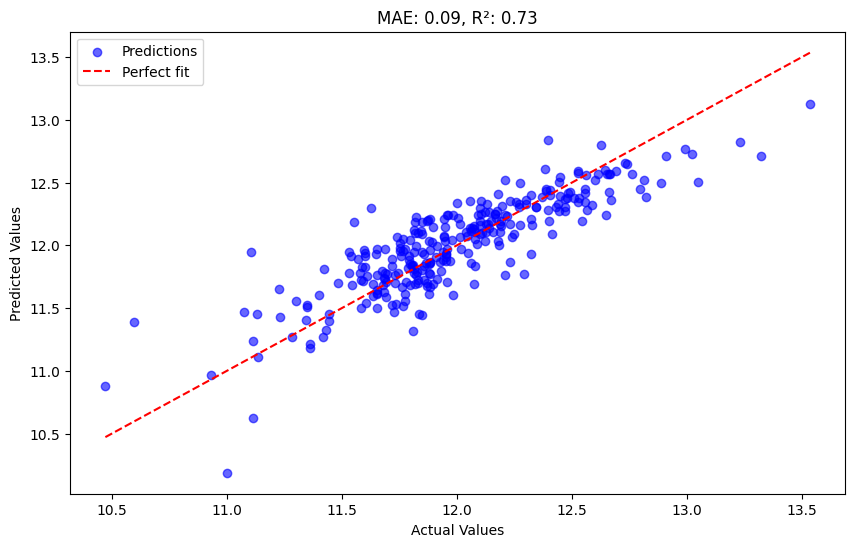

In [234]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predictions', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect fit')

# Labels and title
plt.title(f'MAE: {mae:.2f}, R²: {r2:.2f}')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show plot
plt.show()

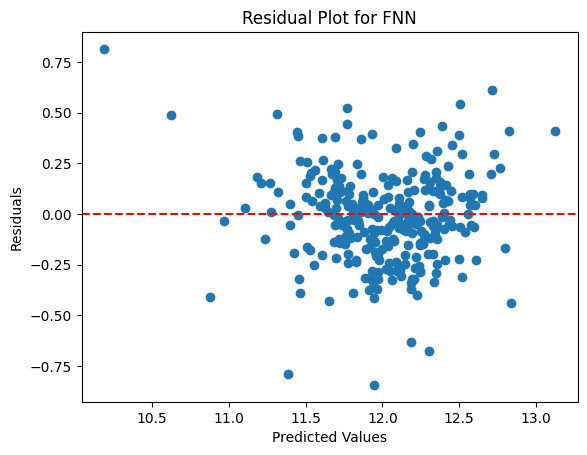

In [241]:
y_pred = y_pred.flatten()  # Flatten the array to make it 1D

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--', label='Zero residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for FNN')
plt.show()

FNN is better model because there is no overfitting despite low r2 score. The model is likely to predict uniformly to unseen data as well.
